# Part II - Ford GoBike Visualization
## by Abdulelah Aljaloud

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
135626,357,2019-02-08 12:17:10.2870,2019-02-08 12:23:07.4380,203.0,Webster St at 2nd St,37.795195,-122.273970,163.0,Lake Merritt BART Station,37.797320,-122.265320,4528,Subscriber,1980.0,Other,No
37882,1271,2019-02-23 12:57:52.0480,2019-02-23 13:19:03.2110,70.0,Central Ave at Fell St,37.773311,-122.444293,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,5925,Subscriber,1990.0,Male,No
126894,1239,2019-02-10 17:02:50.4810,2019-02-10 17:23:29.6170,308.0,San Pedro Square,37.336802,-121.894090,296.0,5th St at Virginia St,37.325998,-121.877120,3815,Subscriber,1992.0,Male,Yes
2812,2095,2019-02-28 17:20:12.9320,2019-02-28 17:55:08.5810,250.0,North Berkeley BART Station,37.873558,-122.283093,251.0,California St at University Ave,37.870555,-122.279720,5192,Subscriber,1974.0,Male,No
79730,504,2019-02-18 17:02:58.7620,2019-02-18 17:11:23.6400,88.0,11th St at Bryant St,37.770030,-122.411726,91.0,Berry St at King St,37.771762,-122.398438,6434,Subscriber,1992.0,Female,No


In [6]:
df = df[df['member_gender'].isnull() == False]
df = df[df['start_station_id'].isnull() == False]
df.start_station_id = df.start_station_id.astype('str')
df.end_station_id = df.end_station_id.astype('str')
df.bike_id = df.bike_id.astype('str')

df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')
df.member_birth_year = df.member_birth_year.astype('int')
df['age'] = 2019 - df['member_birth_year']
df['start_date'] = df['start_time'].dt.strftime('%Y-%m-%d')
df['start_time_month'] = df['start_time'].dt.strftime('%B')
df['start_dayofweek'] = df['start_time'].dt.strftime('%A')
df['start_time_day'] = df['start_time'].dt.day
df['start_time_hour'] = df['start_time'].dt.hour
df['duration_min'] = df['duration_sec'] / 60
df['age_group'] = df['age'].apply(lambda x: '10 - 19' if 10<=x<20
                                                  else '20 - 29' if 20<=x<30
                                                  else '30 - 39' if 30<=x<40
                                                  else '40 - 49' if 40<=x<50
                                                  else '50 - 59' if 50<=x<60
                                                  else '60 - 100' if 60<=x<=141
                                                  else x)


In [8]:
daysorder=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Bike trip count of Subscriber and Customer

> We can notice that Subscribers use bikes on weekdays more than on weekends which can tell us that most subscribers are using it for work.

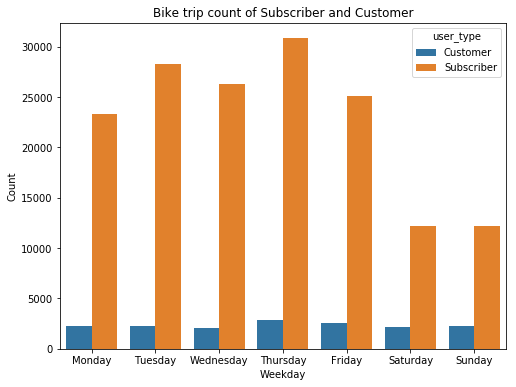

In [9]:
plt.figure(figsize=[8,6])
sb.countplot(data= df, x= 'start_dayofweek', hue= 'user_type', order= daysorder);
plt.xlabel('Weekday');
plt.ylabel('Count');
plt.title('Bike trip count of Subscriber and Customer');

## Count of customers rides in February

> Notice that 30-39 group is the most consistently bike-riders in each day.
20-29 group comes as second, and some days 20-29 group surpassed 30-39.


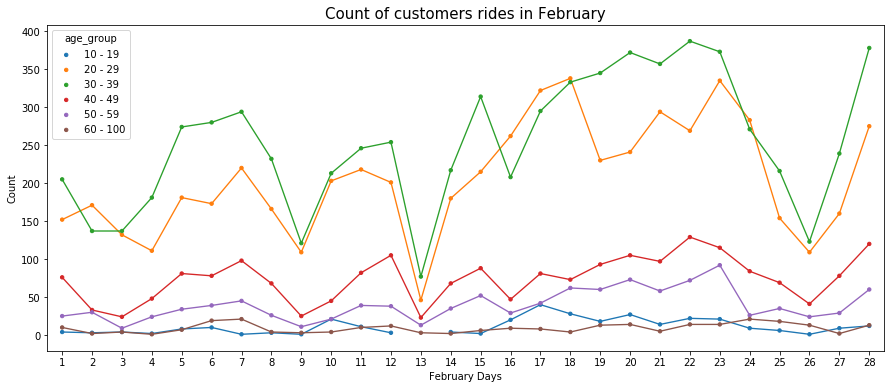

In [10]:
ageCus = df[df['user_type']=='Customer'].groupby(['start_time_day', 'age_group'])
plt.figure(figsize=(15,6))
ageCus= ageCus.agg({'bike_id':'count'}).reset_index()
axis = sb.pointplot(data= ageCus, x ='start_time_day', y= 'bike_id', hue= 'age_group', scale=0.5)
plt.xlabel('February Days')
plt.ylabel('Count');
plt.title('Count of customers rides in February', fontsize= 15);

## Customers and Subscribers duration during weekdays

> This visual shows us that the customers bike-riding duration lasted longer than subscribers in every day with at least +2

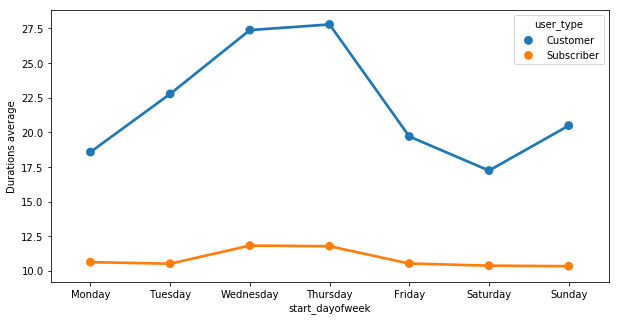

In [11]:
weekmintavgUser = df.groupby(['user_type','start_dayofweek']).duration_min.mean()
weekmintavgUser= weekmintavgUser.reset_index()
plt.figure(figsize=[10,5])
sb.pointplot(data = weekmintavgUser, x= 'start_dayofweek', y= 'duration_min', hue='user_type')
plt.ylabel('Durations average')
plt.xticks(np.arange(0,7), daysorder);

## Customers and Subscribers duration heatmap

> This visual shows us that the Customers bike slightly longer than Subscribers.

In [12]:
def hist2d(x, y, color = 'plasma_r'):
    xbin = np.arange(df['age'].min(), 60, 2)
    ybin = np.arange(0, 45, 2)
    plt.hist2d(x, y, cmin=0.5, cmap = 'plasma_r', bins=[xbin, ybin]);

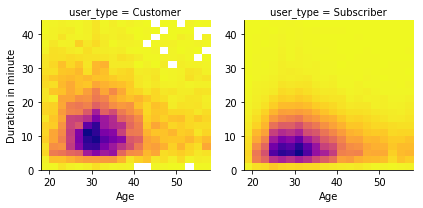

In [13]:
gridType = sb.FacetGrid(data = df, col = 'user_type');
gridType.map(hist2d, 'age', 'duration_min');
gridType.set_xlabels('Age');
gridType.set_ylabels('Duration in minute');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [16]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

/bin/sh: 1: cannot open Part_II_Filename: No such file


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
